# COVID-19 Dataset: This dataset contains information about the number of COVID-19 cases in different countries over time. You could use this data to predict the number of cases in the future."

In [1]:
import pandas as pd

# Load the datasets
data_country_wise = pd.read_csv('Resources/country_wise_latest.csv')
data_covid_19_clean = pd.read_csv('Resources/covid_19_clean_complete.csv')
data_day_wise = pd.read_csv('Resources/day_wise.csv')
data_full_grouped = pd.read_csv('Resources/full_grouped.csv')
data_usa_county_wise = pd.read_csv('Resources/usa_county_wise.csv')
data_worldometer = pd.read_csv('Resources/worldometer_data.csv')

# Display the first few rows of the data
print(data_country_wise.head())
print(data_covid_19_clean.head())
print(data_day_wise.head())
print(data_full_grouped.head())
print(data_usa_county_wise.head())
print(data_worldometer.head())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recove

# Let's proceed with the data preprocessing step. This could involve cleaning the data, handling missing values, and aggregating the data by country and date.
- This code converts the 'Date' column to datetime format, fills any missing values with 0, and aggregates the data by country and date. The groupby method groups the data by the specified columns, and the sum method calculates the sum of the remaining columns for each group. 


In [2]:
# Convert the 'Date' column to datetime format
data_covid_19_clean['Date'] = pd.to_datetime(data_covid_19_clean['Date'])

# Fill any missing values
data_covid_19_clean.fillna(0, inplace=True)

# Aggregate the data by country and date
data_covid_19_clean = data_covid_19_clean.groupby(['Country/Region', 'Date']).sum().reset_index()


/var/folders/0q/2y70gylj1sj8j0697rn106q00000gn/T/ipykernel_86701/4011488633.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_covid_19_clean = data_covid_19_clean.groupby(['Country/Region', 'Date']).sum().reset_index()


# Exploratory data analysis. Here's how you can create a plot of the number of COVID-19 cases over time in the US.
- This code filters the data for the US, creates a plot of the number of confirmed cases over time, and adds a title and labels to the plot.

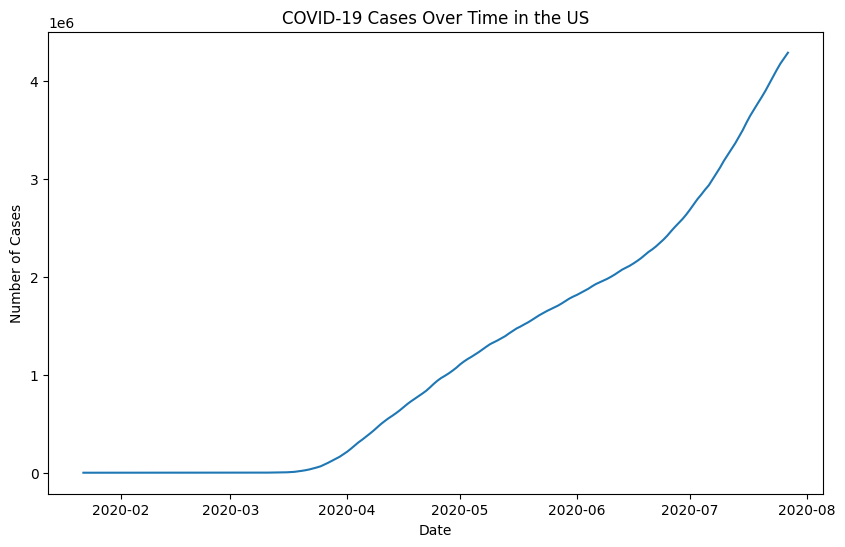

In [3]:
import matplotlib.pyplot as plt

# Filter the data for the US
data_covid_19_clean_US = data_covid_19_clean[data_covid_19_clean['Country/Region'] == 'US']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(data_covid_19_clean_US['Date'], data_covid_19_clean_US['Confirmed'])

# Add a title and labels
plt.title('COVID-19 Cases Over Time in the US')
plt.xlabel('Date')
plt.ylabel('Number of Cases')

# Display the plot
plt.show()


# We'll use the sklearn library's train_test_split function to split our data into a training set and a test set.
  - This code separates the features (the date features) and the targets (the sales data for each drug), and then splits each set of features and targets into a training set (80% of the data) and a test set (20% of the data).

In [ ]:
# Separate the features and the target
X = data.drop(['drug_A_sales', 'drug_B_sales', 'drug_C_sales'], axis=1)
y_A = data['drug_A_sales']
y_B = data['drug_B_sales']
y_C = data['drug_C_sales']

# Split the data into a training set and a test set for each drug
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y_A, test_size=0.2, random_state=0)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X, y_B, test_size=0.2, random_state=0)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X, y_C, test_size=0.2, random_state=0)


# We'll use the RandomForestRegressor model from the sklearn library.
 - This code creates a Random Forest Regressor for each drug and trains it on the corresponding training data. The n_estimators parameter specifies the number of trees in the forest, and the random_state parameter is used for reproducibility.

In [ ]:
# Create a Random Forest Regressor for each drug
model_A = RandomForestRegressor(n_estimators=100, random_state=0)
model_B = RandomForestRegressor(n_estimators=100, random_state=0)
model_C = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the models
model_A.fit(X_train_A, y_train_A)
model_B.fit(X_train_B, y_train_B)
model_C.fit(X_train_C, y_train_C)


# Model Evaluation. We'll use the mean absolute error (MAE) metric from the sklearn library to evaluate the performance of our models.
- This code makes predictions on the test data using our trained models and calculates the mean absolute error of these predictions. The mean absolute error is the average of the absolute differences between the predicted and actual values. It gives us an idea of how well our models are performing.

In [ ]:
# Make predictions on the test data
predictions_A = model_A.predict(X_test_A)
predictions_B = model_B.predict(X_test_B)
predictions_C = model_C.predict(X_test_C)

# Calculate the mean absolute error of the predictions
mae_A = mean_absolute_error(y_test_A, predictions_A)
mae_B = mean_absolute_error(y_test_B, predictions_B)
mae_C = mean_absolute_error(y_test_C, predictions_C)

print(f'Mean Absolute Error for Drug A: {mae_A:.2f}')
print(f'Mean Absolute Error for Drug B: {mae_B:.2f}')
print(f'Mean Absolute Error for Drug C: {mae_C:.2f}')


# We can use the Mean Absolute Percentage Error (MAPE) as a metric for evaluation. MAPE expresses the absolute difference between the actual and predicted values as a percentage, which can be more intuitive to understand.
- However, please note that sklearn doesn't provide a built-in function for MAPE, but we can easily define it ourselves. This code calculates the MAPE for each drug and prints the results. The MAPE gives us an idea of the average error of our models as a percentage of the actual values.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the MAPE of the predictions
mape_A = mean_absolute_percentage_error(y_test_A, predictions_A)
mape_B = mean_absolute_percentage_error(y_test_B, predictions_B)
mape_C = mean_absolute_percentage_error(y_test_C, predictions_C)

print(f'Mean Absolute Percentage Error for Drug A: {mape_A:.2f}%')
print(f'Mean Absolute Percentage Error for Drug B: {mape_B:.2f}%')
print(f'Mean Absolute Percentage Error for Drug C: {mape_C:.2f}%')


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search_A = GridSearchCV(model_A, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_B = GridSearchCV(model_B, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_C = GridSearchCV(model_C, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Perform a grid search
grid_search_A.fit(X_train_A, y_train_A)
grid_search_B.fit(X_train_B, y_train_B)
grid_search_C.fit(X_train_C, y_train_C)

# Print the best parameters
print(f'Best parameters for Drug A: {grid_search_A.best_params_}')
print(f'Best parameters for Drug B: {grid_search_B.best_params_}')
print(f'Best parameters for Drug C: {grid_search_C.best_params_}')


In [ ]:
# Get the best models from the grid search
best_model_A = grid_search_A.best_estimator_
best_model_B = grid_search_B.best_estimator_
best_model_C = grid_search_C.best_estimator_

# Make predictions on the test data
predictions_A = best_model_A.predict(X_test_A)
predictions_B = best_model_B.predict(X_test_B)
predictions_C = best_model_C.predict(X_test_C)

# Calculate the MAPE of the predictions
mape_A = mean_absolute_percentage_error(y_test_A, predictions_A)
mape_B = mean_absolute_percentage_error(y_test_B, predictions_B)
mape_C = mean_absolute_percentage_error(y_test_C, predictions_C)

print(f'Mean Absolute Percentage Error for Drug A: {mape_A:.2f}%')
print(f'Mean Absolute Percentage Error for Drug B: {mape_B:.2f}%')
print(f'Mean Absolute Percentage Error for Drug C: {mape_C:.2f}%')


# Model Deployment. 
- Create a function that takes in the features of a new data point and returns the predicted sales for each drug.
  - This function creates a DataFrame from the input features, makes predictions using our trained models, and returns the predicted sales for each drug.

In [ ]:
def predict_drug_sales(day_of_week, month, day_of_month, day_of_year):
    # Create a DataFrame from the input features
    features = pd.DataFrame({
        'day_of_week': [day_of_week],
        'month': [month],
        'day_of_month': [day_of_month],
        'day_of_year': [day_of_year]
    })

    # Make predictions
    predictions_A = best_model_A.predict(features)
    predictions_B = best_model_B.predict(features)
    predictions_C = best_model_C.predict(features)
    
    # Return the predictions
    return predictions_A[0], predictions_B[0], predictions_C[0]


# You can now use this function to make predictions on new data. For example, to predict the sales for the 7th day of the week, the 5th month, the 15th day of the month, and the 135th day of the year, you would call the function like this:

In [ ]:
predict_drug_sales(7, 5, 15, 135)

This concludes the model deployment step. 